### WeatherPy

In [1]:
'''
The API portion of this solution is based on Juan Luong's published instuctor demo 
'Ins_OpenWeatherDataFrame.ipynb' (6.2 Activity 5)
'''

# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import api_key
import numpy as np
from citipy import citipy
from scipy.stats import linregress
from matplotlib import pyplot as plt

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"



## Generate Cities List

In [2]:
#create lists for saving coordinates
lat_lngs = []
city_list = []

# Create random list of coordinates. Needs 3 decimal places, must be used as float.
lats = np.random.uniform(low=-90.000, high=90.000, size = 1400)
lngs = np.random.uniform(low=-180.000, high=180.000, size = 1400)

# Identify nearest city using citipy library for random lat, lngs pair
for i in range(len(lats)):
    city = citipy.nearest_city(lats[i], lngs[i]).city_name
    if city not in city_list:
        city_list.append(city)
   


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
lat = []
lng=[]
temp = []
humidity = []
cloudiness = []
wind =[]
cities = []

#Country required for later (VacationPy)
country=[]

# Loop through the list of cities and perform a request for data on each
for city in city_list:
    #Using try - except block to move past cities without OpenWeather data
    try:
        print(city)
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        cities.append(city)
        #Use length of lat list to track additions
        print(f"City number {len(lat)} is {city}.")
    except:
        continue
        #Print error message where data is not found
        print(f"City ({city}) not returning OpenWeather data. Try next city...")




hobart
City number 1 is hobart.
babusnica
City number 2 is babusnica.
tiksi
City number 3 is tiksi.
malanje
City number 4 is malanje.
altay
City number 5 is altay.
college
City number 6 is college.
ouallam
City number 7 is ouallam.
kencong
City number 8 is kencong.
ushuaia
City number 9 is ushuaia.
taolanaro
albany
City number 10 is albany.
victoria
City number 11 is victoria.
kirakira
City number 12 is kirakira.
bereznik
City number 13 is bereznik.
cabo san lucas
City number 14 is cabo san lucas.
rawson
City number 15 is rawson.
rikitea
City number 16 is rikitea.
port blair
City number 17 is port blair.
ponta delgada
City number 18 is ponta delgada.
punta arenas
City number 19 is punta arenas.
zuya
City number 20 is zuya.
thompson
City number 21 is thompson.
vaini
City number 22 is vaini.
north bend
City number 23 is north bend.
antoniny
City number 24 is antoniny.
atuona
City number 25 is atuona.
bethel
City number 26 is bethel.
kavaratti
City number 27 is kavaratti.
talnakh
City num

City number 211 is cayenne.
ukiah
City number 212 is ukiah.
san policarpo
City number 213 is san policarpo.
makakilo city
City number 214 is makakilo city.
solovetskiy
port-gentil
City number 215 is port-gentil.
ashtian
City number 216 is ashtian.
ranong
City number 217 is ranong.
mackay
City number 218 is mackay.
saint-joseph
City number 219 is saint-joseph.
khowai
City number 220 is khowai.
umea
City number 221 is umea.
ipixuna
City number 222 is ipixuna.
kerema
City number 223 is kerema.
zhezkazgan
City number 224 is zhezkazgan.
kennewick
City number 225 is kennewick.
fortuna
City number 226 is fortuna.
malabo
City number 227 is malabo.
ondjiva
City number 228 is ondjiva.
jiazi
City number 229 is jiazi.
aksarka
City number 230 is aksarka.
cam ranh
City number 231 is cam ranh.
matveyevka
City number 232 is matveyevka.
ilhabela
City number 233 is ilhabela.
abu kamal
City number 234 is abu kamal.
avera
City number 235 is avera.
insar
City number 236 is insar.
rocha
City number 237 is r

City number 422 is bukachacha.
nadym
City number 423 is nadym.
abbeville
City number 424 is abbeville.
ramos arizpe
City number 425 is ramos arizpe.
paita
City number 426 is paita.
souillac
City number 427 is souillac.
lagoa
City number 428 is lagoa.
astana
City number 429 is astana.
rafaela
City number 430 is rafaela.
gat
City number 431 is gat.
macas
City number 432 is macas.
juneau
City number 433 is juneau.
saleaula
hirara
City number 434 is hirara.
mana
City number 435 is mana.
perry
City number 436 is perry.
saldanha
City number 437 is saldanha.
urdzhar
narsaq
City number 438 is narsaq.
alofi
City number 439 is alofi.
pancas
City number 440 is pancas.
lasa
City number 441 is lasa.
karaton
City number 442 is karaton.
puri
City number 443 is puri.
picota
City number 444 is picota.
golfito
City number 445 is golfito.
tabuk
City number 446 is tabuk.
brenham
City number 447 is brenham.
tarata
City number 448 is tarata.
wollongong
City number 449 is wollongong.
redlands
City number 450

In [4]:
#Check query has returned at least 500 cities
print(len(cities))

540


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Save lists to dataframe
weather_dict = {
    "City": cities,
    "Country": country,
    "Lat": lat,
    "Lng": lng,
    "Temp": temp,
    "Humidity":humidity,
    "Wind Speed": wind,
    "Cloudiness": cloudiness
}

#Create a copy 
weather_data = pd.DataFrame(weather_dict)

#Save dataframe to *.csv
weather_data.to_csv("weatherpy.csv")

#Check *.csv by importing and printing
filepath= "weatherpy.csv"
weather_df = pd.read_csv(filepath)
weather_df.head()


,Unnamed: 0,City,Country,Lat,Lng,Temp,Humidity,Wind Speed,Cloudiness
0,0,hobart,AU,-42.88,147.33,50.95,66,1.12,75
1,1,babusnica,RS,43.06,22.41,55.99,10,4.99,100
2,2,tiksi,RU,71.69,128.87,3.02,93,4.68,96
3,3,malanje,AO,-9.54,16.34,67.15,87,1.66,99
4,4,altay,CN,47.87,88.12,25.03,81,1.74,0



## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 


In [6]:
#Check for 100% humidity
bad_weather = weather_df.loc[(weather_df["Humidity"]==100),:]
len(bad_weather)


21

In [7]:
#Create new DF without 100% humidity locations
good_weather = weather_df.loc[(weather_df["Humidity"]<100),:]
clean_city_data = good_weather

#View output
clean_city_data

,Unnamed: 0,City,Country,Lat,Lng,Temp,Humidity,Wind Speed,Cloudiness
0,0,hobart,AU,-42.88,147.33,50.95,66,1.12,75
1,1,babusnica,RS,43.06,22.41,55.99,10,4.99,100
2,2,tiksi,RU,71.69,128.87,3.02,93,4.68,96
3,3,malanje,AO,-9.54,16.34,67.15,87,1.66,99
4,4,altay,CN,47.87,88.12,25.03,81,1.74,0
...,...,...,...,...,...,...,...,...,...
535,535,hawalli,KW,29.28,48.00,69.80,64,4.70,5
536,536,korla,CN,41.76,86.15,38.39,67,1.92,0
537,537,chiquinquira,CO,5.62,-73.82,59.58,95,2.66,87
538,538,novobirilyussy,RU,56.95,90.67,26.28,98,6.02,97


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

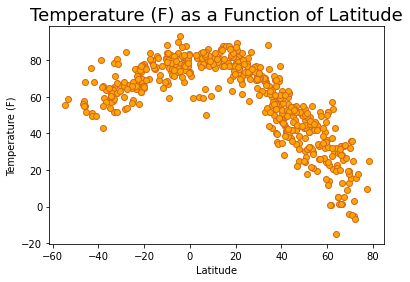

In [8]:
#All scatter plots - justifies making a function to reduce rework

def plotter(y_val, y_label):
    
    x_label = "Latitude"
    x_val = [clean_city_data["Lat"]]
    title = (f"{y_label} as a Function of {x_label}")
    
    # Build a scatter plot for each data type
    plt.scatter(clean_city_data["Lat"], y_val, marker="o", edgecolors="chocolate",facecolors="orange")
    
    # Incorporate the other graph properties
    plt.title(title, fontsize = 18)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.grid(False)

    # Show plot
    return plt.show()

#Set values for variables required in plotter function
y_val = clean_city_data["Temp"]
y_label = "Temperature (F)"

#Graph results
plotter(y_val, y_label)


## Latitude vs. Humidity Plot

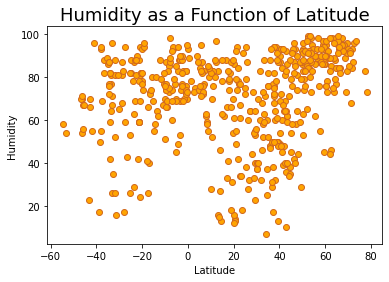

<Figure size 432x288 with 0 Axes>

In [9]:
#Set values
y_val = [clean_city_data["Humidity"]]
y_label = "Humidity"

#Output graph
plotter(y_val, y_label)

#Save graph. Probably should have returned fig_name from plotter to save rework.
fig_name = (f"Lat_vs_{y_label}.png")
plt.savefig(fig_name)




## Latitude vs. Cloudiness Plot

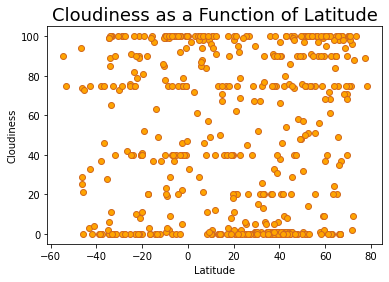

<Figure size 432x288 with 0 Axes>

In [10]:
#Set and grpah
y_val = [clean_city_data["Cloudiness"]]
y_label = "Cloudiness"
plotter(y_val, y_label)

#Save
plt.savefig("Cloudiness_vs_Latitude.png")

## Latitude vs. Wind Speed Plot

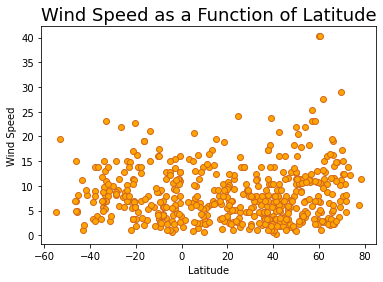

<Figure size 432x288 with 0 Axes>

In [11]:
#Set and graph
y_val = [clean_city_data["Wind Speed"]]
y_label = "Wind Speed"
plotter(y_val, y_label)

#Save
plt.savefig("Wind_Speed_vs_Latitude.png")

## Linear Regression

In [12]:
'''
Making a linear regression function
'''
#Annotation on y-axis needs to shift with each plot; declaring variable outside function
y_ann =-50


#Linear regression function, save rework later
def lr_plotter(y_val, y_label, y_ann, hemi):
    
    #x-label is latitude for all plots; declaring inside function
    x_label = "Latitude"
    title = (f"{y_label} as a Function of {x_label}")

    #Latitude ranges for hemispheres fixed, so use hemisphere for annotation position
    if hemi == "n":
        x_val = northern_df["Lat"]
        x_ann = 0
    else:
        x_val = southern_df["Lat"]
        x_ann = -50

    # Build a scatter plot for each data type
    plt.scatter(x_val, y_val, marker="o", edgecolors="chocolate",facecolors="orange")

    # Incorporate the other graph properties
    plt.title(title, fontsize = 18)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.grid(False)

    #Set up regression
    (slope, intercept, rvalue, pvalue,stderr) = linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    line_eq = (f"y= " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
    
    #Plot data, regresson equation and annotation
    plt.plot(x_val, regress_values, "r-")
    plt.annotate(line_eq,(x_ann,y_ann),fontsize=12,color="firebrick")
    
    return plt.show()


## Hemisphere Data

In [14]:
#Separate into two dataframes based on latitude
southern_df = clean_city_data.loc[(clean_city_data["Lat"])<=0]
northern_df = clean_city_data.loc[(clean_city_data["Lat"])>=0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

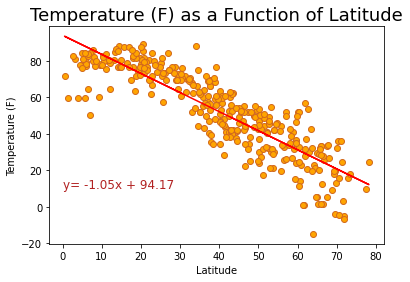

<Figure size 432x288 with 0 Axes>

In [16]:
#Set variables and graph
y_val = northern_df["Temp"]
y_label = "Temperature (F)"
hemi = "n"
y_ann=10
lr_plotter(y_val, y_label, y_ann, hemi)

#Save
plt.savefig("N_Regress_Temp_vs_Latitude.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

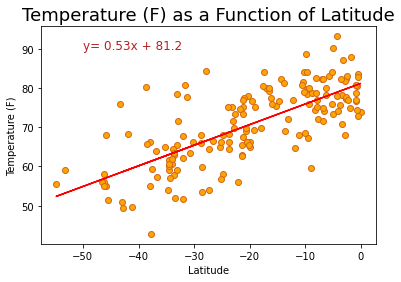

<Figure size 432x288 with 0 Axes>

In [17]:
#Graph
y_val = southern_df["Temp"]
y_label = "Temperature (F)"
hemi = "s"
y_ann=90
lr_plotter(y_val, y_label, y_ann, hemi)

#Save
plt.savefig("S_Regress_Temp_vs_Latitude.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

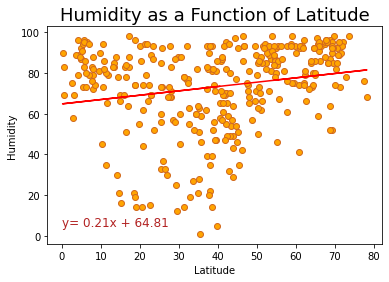

In [70]:
#Graph
y_val = northern_df["Humidity"]
y_label = "Humidity"
y_ann = 5
hemi = "n"
lr_plotter(y_val, y_label, y_ann, hemi)

#Save
plt.savefig("N_Humidity_vs_Latitude.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

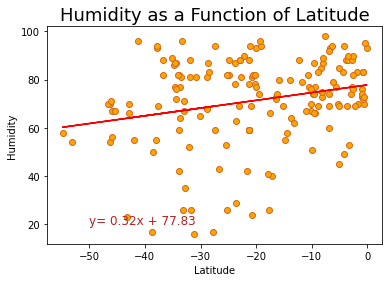

<Figure size 432x288 with 0 Axes>

In [18]:
#Graph
y_val = southern_df["Humidity"]
y_label = "Humidity"
y_ann = 20
hemi = "s"
lr_plotter(y_val, y_label, y_ann, hemi)

#Save
plt.savefig("S_Humidity_vs_Latitude.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

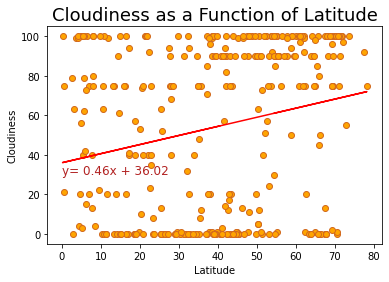

In [73]:
#Graph
y_val = northern_df["Cloudiness"]
y_label = "Cloudiness"
y_ann = 30
hemi = "n"
lr_plotter(y_val, y_label, y_ann, hemi)

#Save
plt.savefig("N_Cloudiness_vs_Latitude.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

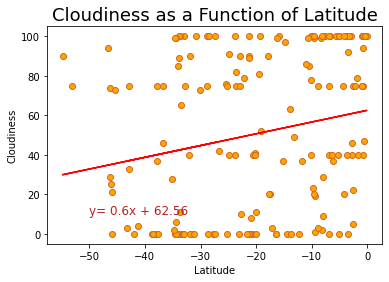

<Figure size 432x288 with 0 Axes>

In [19]:
#Graph
y_val = southern_df["Cloudiness"]
y_label = "Cloudiness"
y_ann = 10
hemi = "s"
lr_plotter(y_val, y_label, y_ann, hemi)

#Save
plt.savefig("S_Cloudiness_vs_Latitude.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

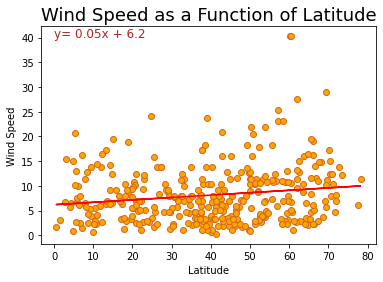

<Figure size 432x288 with 0 Axes>

In [20]:
#Graph
y_val = northern_df["Wind Speed"]
y_label = "Wind Speed"
hemi = "n"
y_ann = 40
lr_plotter(y_val, y_label, y_ann, hemi)

#Save
plt.savefig("N_Wind_Speed_vs_Latitude.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

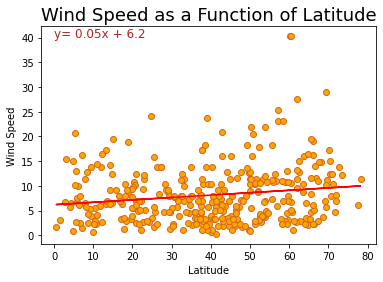

<Figure size 432x288 with 0 Axes>

In [21]:
#Graph
y_val = northern_df["Wind Speed"]
y_label = "Wind Speed"
hemi = "n"
y_ann = 40
lr_plotter(y_val, y_label, y_ann, hemi)

#Save
plt.savefig("S_Wind_Speed_vs_Latitude.png")